In [1]:
from manim import *
import math
import numpy as np
from manim_slides import *
import random
from MF_Tools import *
import os
os.environ["PATH"] = "/Library/TeX/texbin:" + os.environ["PATH"]

/Users/mnica/py_projects/.venv/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
/Users/mnica/py_projects/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
## Global Variables and Stuff ##
#config.media_embed = True
DELAY = 0.1

# latex preamble
texPre = TexTemplate()
texPre.add_to_preamble(r"""
    \usepackage{amsmath}
    \usepackage{amssymb}
    \newcommand{\P}{\mathbb{P}}
""") 

# tex color dictionary
E_color = GREY_B

t2cD = {
    "\P" : E_color, 
}

# font sizes
my_fs = 75

In [73]:
%%manim -ql -v WARNING OpeningScene

class OpeningScene(Scene):
    def pause(self):
        self.wait(DELAY)
        #self.next_slide() #comment in for manim-slides
    
    def construct(self):
        # Titles
        Tuesday_color = "#73d2de"
        text_fs = 32
        title_fs = 32
        paradox_fs = 36
        paradox_txt = Text("Paradox:", font_size=paradox_fs)
        paradox_width = paradox_txt.get_width()
        titles = VGroup(
        VGroup(Text("Birthday", font_size=title_fs).set_width(paradox_width), paradox_txt.copy()).arrange(DOWN,buff=0.05),
        VGroup(Text("Two Child", font_size=title_fs).set_width(paradox_width), paradox_txt.copy()).arrange(DOWN,buff=0.05),
        VGroup(Text("Two Child", font_size=title_fs).set_width(paradox_width),Text("2 Tuesday", font_size=title_fs,color=Tuesday_color).set_width(paradox_width), paradox_txt.copy()).arrange(DOWN,buff=0.05),
        ).arrange(DOWN, aligned_edge=RIGHT, buff=1)

        
        # Explanations
        math_fs = text_fs*1.5
        texts = VGroup(
        VGroup(Text("In a room of 23 people, what is the chance two share a birthday?", font_size=text_fs),MathTex(r"\text{Answer: }",r"\approx 50.7\%",font_size=math_fs)).arrange(DOWN,aligned_edge=LEFT,buff=0.05),
        VGroup(Text("Mr. Smith has two kids. Given that at least one of them is a boy,\nwhat is the chance that both are boys?", font_size=text_fs),MathTex(r"\text{Answer: }",r"\approx 33.3\%",font_size=math_fs)).arrange(DOWN,aligned_edge=LEFT,buff=0.05),
        VGroup(Text("Mr. Smith has two kids. Given that at least one of them is a boy \nborn on a Tuesday, what is the chance that both are boys?", t2c={"born on a Tuesday": Tuesday_color}, t2w={"born on a Tuesday": BOLD}, font_size=text_fs),MathTex(r"\text{Answer: }",r"\approx 48.1\%",font_size=math_fs)).arrange(DOWN,aligned_edge=LEFT,buff=0.05),

        ).arrange(DOWN, aligned_edge=LEFT, buff=1)

        for i in range(len(texts)):
            texts[i][1][0].set_color( "#ffbc42"  )
            texts[i][1][1].set_color( "#ffbc42" )
            


        titles.next_to(texts,LEFT)

        # Place side by side like a table
        content = VGroup()
        for title, text in zip(titles, texts):
            title.next_to(text,LEFT,buff=1)
            title.align_to(text,UP)
            row = VGroup(title, text) #.arrange(RIGHT, buff=0.5)
            content.add(row)


        #content.arrange(DOWN) #, aligned_edge=LEFT, buff=1)
        #content.scale(0.9).to_edge(LEFT)
        content.to_edge(RIGHT)
        self.add(content[0:2])
        #self.play(Write(content))
        #self.wait(3)
        self.play(ReplacementTransform(content[1][0].copy(),content[2][0]))
        self.pause()
        self.play(ReplacementTransform(content[1][1][0].copy(),content[2][1][0]))
        self.pause()
        self.play(Write(content[2][1][1]))
        self.pause()    
        



Manim Community v0.19.0

<string>:14: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:16: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
<string>:17: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
<string>:18: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


In [102]:
def stick_man(eye_angle = 0.1, my_scale = 0.5, txt = "1"):
    # Head
    head = Circle(radius=0.7, fill_opacity=1,color=WHITE ).shift(UP * 0.5)
    # Draw the spider's eyes
    eye1 = Circle(radius=0.25, color=BLACK, fill_opacity=1).shift(UP * 0.7 + LEFT * 0.3)
    eye2 = Circle(radius=0.25, color=BLACK, fill_opacity=1).shift(UP * 0.7 + RIGHT * 0.3)
    # Add eyeballs to the eyes
    eye_x = np.cos(eye_angle)*0.1
    eye_y = np.sin(eye_angle)*0.1
    eyeball1 = Circle(radius=0.1, color=WHITE, fill_opacity=1).shift(UP * 0.7 + RIGHT*eye_x + UP*eye_y + LEFT * 0.3)
    eyeball2 = Circle(radius=0.1, color=WHITE, fill_opacity=1).shift(UP * 0.7 + RIGHT*eye_x + UP*eye_y + RIGHT * 0.3)
    label = MathTex(txt, font_size=70, color = GREY_D)
    label.align_to(head,DOWN)
    label.shift(UP*0.1)
    # Body
    body = Line(head.get_bottom(), head.get_bottom() + DOWN * 1.5)
    # Arms (sloped downward from shoulders)
    shoulder_y = head.get_bottom()[1] - 0.3
    arms = VGroup(
        Line(start=[0, shoulder_y, 0], end=[-0.8, shoulder_y - 0.4, 0]),  # Left arm sloping down
        Line(start=[0, shoulder_y, 0], end=[0.8, shoulder_y - 0.4, 0])   # Right arm sloping down
    )
    # Legs (from bottom of body)
    leg_start = body.get_end()
    legs = VGroup(
        Line(leg_start, leg_start + DOWN * 1 + LEFT * 0.5),  # Left leg
        Line(leg_start, leg_start + DOWN * 1 + RIGHT * 0.5)  # Right leg
    )
    # Group and display
    return VGroup(head, eye1, eye2, eyeball1, eyeball2, body, arms, legs, label).scale(my_scale) #.set_z_index(2)


In [172]:
def labelled_hat(location = ORIGIN, txt = "1", hat_color = "#ffbc42"):
    # Triangular hat above head
    hat = Polygon(
        location + LEFT*0.5 + DOWN*0.1,
        location + RIGHT*0.5 + DOWN*0.1,
        location + UP*0.8,
        color=hat_color,
        fill_opacity=1
    )
    pom_pom = Circle(radius=0.1, color=WHITE, fill_opacity=1).move_to(hat.get_top())

    # Label on head
    label = Text(txt, font_size=60, color = WHITE, stroke_width=2,stroke_color=BLACK ,weight=BOLD)   # Outline color)
    label.move_to(hat).align_to(hat,DOWN).shift(UP*0.05)

    return VGroup(hat, pom_pom, label)

def stick_man(eye_angle = 0.1, my_scale = 0.5, txt = "1", hat_color = "#ffbc42"):
    # Head
    head = Circle(radius=0.7, fill_opacity=1,color=WHITE ).shift(UP * 0.5)
    
    # Draw the spider's eyes
    eye1 = Circle(radius=0.25, color=BLACK, fill_opacity=1).shift(UP * 0.7 + LEFT * 0.3)
    eye2 = Circle(radius=0.25, color=BLACK, fill_opacity=1).shift(UP * 0.7 + RIGHT * 0.3)

    # Add eyeballs to the eyes
    eye_x = np.cos(eye_angle)*0.1
    eye_y = np.sin(eye_angle)*0.1
    eyeball1 = Circle(radius=0.1, color=WHITE, fill_opacity=1).shift(UP * 0.7 + RIGHT*eye_x + UP*eye_y + LEFT * 0.3)
    eyeball2 = Circle(radius=0.1, color=WHITE, fill_opacity=1).shift(UP * 0.7 + RIGHT*eye_x + UP*eye_y + RIGHT * 0.3)

    # Triangular hat above head
    my_hat = labelled_hat(head.get_top(), txt, hat_color)
    #hat = Polygon(
    #    head.get_top() + LEFT*0.5 + DOWN*0.1,
    #    head.get_top() + RIGHT*0.5 + DOWN*0.1,
    #    head.get_top() + UP*0.8,
    #    color=hat_color,
    #    fill_opacity=1
    #)
    #pom_pom = Circle(radius=0.1, color=WHITE, fill_opacity=1).move_to(hat.get_top())

    # Label on head
    #label = Text(txt, font_size=60, color = WHITE, stroke_width=2,stroke_color=BLACK ,weight=BOLD)   # Outline color)
    #label.move_to(hat).align_to(hat,DOWN).shift(UP*0.05)

    # Body
    body = Line(head.get_bottom(), head.get_bottom() + DOWN * 1.5)

    # Arms (sloped downward from shoulders)
    shoulder_y = head.get_bottom()[1] - 0.3
    arms = VGroup(
        Line(start=[0, shoulder_y, 0], end=[-0.8, shoulder_y - 0.4, 0]),  # Left arm sloping down
        Line(start=[0, shoulder_y, 0], end=[0.8, shoulder_y - 0.4, 0])   # Right arm sloping down
    )

    # Legs (from bottom of body)
    leg_start = body.get_end()
    legs = VGroup(
        Line(leg_start, leg_start + DOWN * 1 + LEFT * 0.5),  # Left leg
        Line(leg_start, leg_start + DOWN * 1 + RIGHT * 0.5)  # Right leg
    )

    # Group and display
    return VGroup(head, eye1, eye2, eyeball1, eyeball2, body, arms, legs, my_hat).scale(my_scale)


In [ ]:
%%manim -ql -v WARNING Test
#%%manim_slides -ql -v WARNING Spider --manim-slides controls=false
# Choose to do regular manim or manim-slides by choosing the correct jupyter magic. Must be first line.

class Test(Scene):  # Scene): # change to MyScene(Slide) for manim-slides
    def pause(self):
        self.wait(DELAY)
        #self.next_slide() #comment in for manim-slides
    
    def construct(self):
        colors = ["#ffbe0b", "#fb5607", "#ff006e", "#8338ec", "#3a86ff"]
        figures = VGroup(*[stick_man(txt=str(i),hat_color = colors[i-1]) for i in range(1,5+1)]).arrange(LEFT)
        figures.to_corner(UR)
        self.add(figures[0])

        def person_k_enters_node(k):
            my_hat = labelled_hat(ORIGIN, txt=str(k), hat_color = colors[k-1])
            text = Text(" enters", font_size=60)
            text.next_to(my_hat,RIGHT)   # Outline color)
            rect = SurroundingRectangle(VGroup(my_hat,text), color=WHITE, buff=0.2)  #.set_stroke(BLACK, 3, 1)text, buff=0.1)
            return VGroup(rect,my_hat,text).scale(0.75)
        

        def add_layer(root_node, node_left, node_right, left_label_txt, right_label_txt):

            # Bottom center of the node
            bottom_center = root_node.get_bottom()

            # Arrow parameters
            offset = root_node.get_width()/2      # horizontal distance
            arrow_length = root_node.get_width()/3 # vertical distance
            left_color = GREEN_B
            right_color = RED_A
            # Create arrows
            arrow_left = Arrow(
                start=bottom_center,
                end=bottom_center + LEFT*offset + DOWN*arrow_length,
                buff=0,
                color = left_color
            )
            arrow_right = Arrow(
                start=bottom_center,
                end=bottom_center + RIGHT*offset + DOWN*arrow_length,
                buff=0,
                color = right_color
            )

            # Add labels to arrows
            label_fs = 35
            label_left = MathTex(left_label_txt, font_size=label_fs,color = left_color).move_to(arrow_left).shift(offset*LEFT).align_to(arrow_left,UP)
            label_right = MathTex(right_label_txt, font_size=label_fs,color = right_color).move_to(arrow_right).shift(offset*RIGHT).align_to(arrow_right,UP)

            # Add child nodes at arrow tips
            node_left.move_to(arrow_left.get_end()) # Rectangle(width=1, height=0.5, color=GREEN).move_to(arrow_left.get_end())
            node_left.align_to(arrow_left.get_end(),UP)
            node_right.move_to(arrow_right.get_end()) # Rectangle(width=1, height=0.5, color=GREEN).move_to(arrow_right.get_end())
            node_right.align_to(arrow_right.get_end(),UP)
            return VGroup(arrow_left, arrow_right, label_left, label_right)
        
        k_min = 2
        k_max = 5
        nodes = VGroup(*[person_k_enters_node(i) for i in range(k_min,k_max+1)])
        nodes_match = VGroup(*[Text("Birthday \n Match!",font_size=30) for i in range(k_min,k_max+1)])
        layers = VGroup()
        all_unique_node = Text("All Different \n Birthdays!",font_size=30)
        nodes[0].to_edge(UP)
        nodes[0].to_edge(LEFT,buff=2.0)
        for k in range(k_min,k_max):
            layer = add_layer(nodes[k-k_min], nodes_match[k-k_min], nodes[k-k_min+1], r"\frac{"+str(k-1)+"}{365}", r"\frac{"+str(365-k+1)+"}{365}")
            layers += layer
            #self.add(nodes[k-k_min],layer,nodes_match[k-k_min],nodes[k-k_min+1])
            #self.pause()
        layer = add_layer(nodes[k_max-k_min], nodes_match[k_max-k_min], all_unique_node, r"\frac{"+str(k_max-1)+"}{365}", r"\frac{"+str(365-k_max+1)+"}{365}")
        layers += layer
        #self.add(nodes[k_max-k_min],layer,nodes_match[k_max-k_min],all_unique_node)
        arrow_tip = layers[0][1].get_end()
        all_unique_node.move_to(arrow_tip).align_to(arrow_tip,UP)
        
        figures[1].generate_target()
        figures[1].next_to(nodes[0],RIGHT)
        self.play(Create(figures[1]))     
        self.pause()

        self.play(MoveToTarget(figures[1]),Create(nodes[0]))
        self.pause()

        self.play(Create(layers[0][0])) #same birthday arrow
        self.play(Write(layers[0][2])) #same birthday P=
        self.play(Write(nodes_match[0])) #same birthday node
        self.pause()

        self.play(Create(layers[0][1])) #different birthday arrow
        self.play(Write(layers[0][3])) #different birthday P=
        self.play(Write(all_unique_node)) #different birthday node
        self.pause()

        figures[2].generate_target()
        figures[2].next_to(nodes[0],RIGHT)
        self.play(Create(figures[2]))     
        self.pause()

        self.play(MoveToTarget(figures[2]),Create(nodes[1]),FadeOut(all_unique_node,shift=DOWN))
        self.pause()


        
        #all_unique_node.generate_target()
        arrow_tip = layers[1][1].get_end()
        all_unique_node.move_to(arrow_tip).align_to(arrow_tip,UP)
        self.play(FadeIn(nodes[1],nodes_match[1],layers[1],shift=DOWN),MoveToTarget(all_unique_node))
        self.pause()


Manim Community v0.19.0

<string>:29: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:30: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:29: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:30: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:29: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:30: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:29: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:30: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.


Manim Community v0.19.0

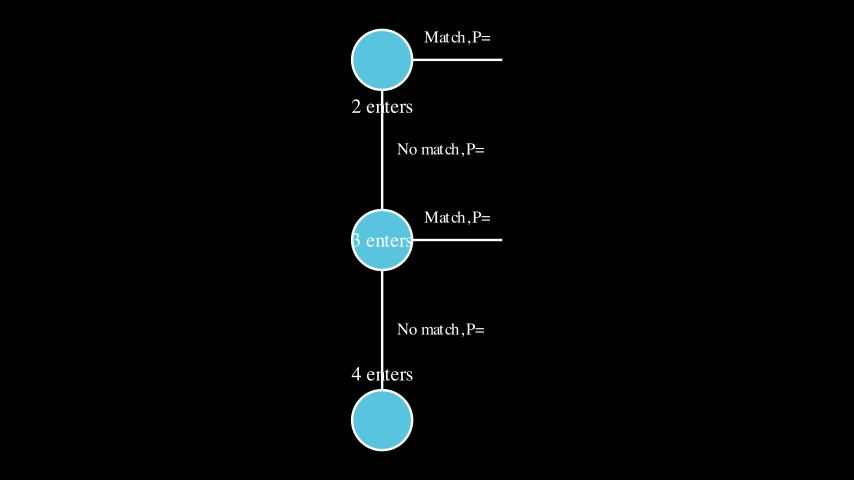

In [192]:
%%manim -ql -v WARNING ProbabilityTree

class ProbabilityTree(Scene):
    def construct(self):
        # Nodes
        nodes_text = ["2 enters", "3 enters", "4 enters"]
        nodes = VGroup(*[
            Circle(radius=0.5, color=WHITE, fill_opacity=1).set_fill(BLUE, opacity=1),
            Circle(radius=0.5, color=WHITE, fill_opacity=1).set_fill(BLUE, opacity=1),
            Circle(radius=0.5, color=WHITE, fill_opacity=1).set_fill(BLUE, opacity=1)
            ])
        labels = VGroup(*[Text(t, font_size=24, color=WHITE) for t in nodes_text])
        for node, label in zip(nodes, labels):
            label.move_to(node.get_center())


        # Arrange nodes vertically
        nodes.arrange(DOWN, buff=2)
        labels.arrange(DOWN, buff=2)


        # Edges
        edges = VGroup()
        edge_labels = VGroup()


        for i in range(len(nodes)):
        # Edge to next node (No match)
            if i < len(nodes) - 1:
                line = Line(nodes[i].get_bottom(), nodes[i+1].get_top())
                edges.add(line)
                edge_label = Text("No match, P=", font_size=20)
                edge_label.next_to(line.get_center(), RIGHT)
                edge_labels.add(edge_label)
                # Edge to terminal (Match)
                match_line = Line(nodes[i].get_right(), nodes[i].get_right() + RIGHT*1.5)
                edges.add(match_line)
                match_label = Text("Match, P=", font_size=20)
                match_label.next_to(match_line.get_center(), UP)
                edge_labels.add(match_label)


        # Group everything
        tree = VGroup(nodes, labels, edges, edge_labels)
        tree.move_to(ORIGIN)

        self.add(tree)
        #self.play(*[Write(m) for m in tree])
        #self.wait(3)

In [ ]:
%%manim -ql -v WARNING FractionGrid

class FractionGrid(Scene):
    
    def construct(self):
        # Define fraction grid as LaTeX strings
        #fraction_grid = [
        #    ["0", "0", "0", "0",  "0"],
        #    ["\\frac{1}{16}", "\\frac{1}{8}", "\\frac{1}{4}", "\\frac{1}{2}", "1"],
        #    ["\\frac{6}{32}", "\\frac{5}{16}", "\\frac{4}{8}", "\\frac{3}{4}", "1"],
        #    ["\\frac{22}{64}", "\\frac{16}{32}", "\\frac{11}{16}", "\\frac{7}{8}", "1"],
        #    ["\\frac{1}{2}", "\\frac{42}{64}", "\\frac{26}{32}", "\\frac{15}{16}", "1"]
        #]
        fraction_grid = [
           ["0", "0", "0", "0",  "0"],
           ["{1 \\over 16}", "{1 \\over 8}", "{1 \\over 4}", "{1 \\over 2}", "1"],
           ["{6 \\over 32}", "{5 \\over 16}", "{4 \\over 8}", "{3 \\over 4}", "1"],
           ["{22 \\over 64}", "{16 \\over 32}", "{11 \\over 16}", "{7 \\over 8}", "1"],
           ["{64 \\over 128}", "{42 \\over 64}", "{26 \\over 32}", "{15 \\over 16}", "1"]
        ]

        delta_grid = [
            [".", ".", ".", ".",  "."],
            ["{1 \\over 16}", "{1 \\over 8}", "{1 \\over 4}", "{1 \\over 2}", "."],
            ["{1 \\over 8}", "{3 \\over 16}", "{1 \\over 4}", "{1 \\over 4}", "."],
            ["{5 \\over 32}", "{3 \\over 16}", "{3 \\over 16}", "{1 \\over 8}", "."],
            ["{5 \\over 32}", "{5 \\over 32}", "{1 \\over 8}", "{1 \\over 16}", "."]
        ]

        rows = len(fraction_grid)
        cols = len(fraction_grid[0])
        #print(rows,cols)
        box_size = 1.2
        frac_fs = 36
        label_fs = 32
        grid_color = GREY_D

        grid = VGroup()
        fracs = VGroup()
        for i in range(rows):
            row_grid = VGroup()
            row_fracs = VGroup()
            for j in range(cols):
                # Create fixed-size square
                square = Square(side_length=box_size,color=grid_color)
                square.move_to(RIGHT * j * box_size + DOWN * i * box_size)

                # Create fraction and center it in the square
                frac = MathTex(fraction_grid[i][j],font_size=frac_fs)
                frac.move_to(square.get_center())
                if j == cols-1 or i == 0:
                    frac.scale(1.5)

                # Group together
                #cell = VGroup(square, frac).copy()
                #frac.set_opacity(0)
                row_grid.add(square)
                row_fracs.add(frac)
            grid.add(row_grid)
            fracs.add(row_fracs)

        # Center the whole grid
        VGroup(grid,fracs).move_to(ORIGIN)

        # Column labels: 0 to 4 (under each column)
        col_labels = VGroup()
        for j in range(cols):
            label = MathTex("X","=",str(j),tex_to_color_map=t2cD,font_size=label_fs)
            label[2].set_color(x_color)
            label.next_to(grid[-1][j], DOWN)
            #x = grid[0][j].get_center()[0]
            #y = grid[-1][j][0].get_bottom()[1] - 0.4  # get bottom of square
            #label.move_to([x, y, 0])
            col_labels.add(label)

        # Row labels: 4 to 0 (left of each row)
        row_labels = VGroup()
        for i in range(rows):
            label = MathTex("Y","=",str(rows - 1 - i),tex_to_color_map=t2cD,font_size=label_fs)
            label[2].set_color(y_color)
            label.next_to(grid[i][0], LEFT)
            #y = grid[i][0].get_center()[1]
            #x = grid[i][0][0].get_left()[0] - 0.4  # get left of square
            #label.move_to([x, y, 0])
            row_labels.add(label)

        grid[0][-1].set_opacity(0)
        fracs[0][-1].set_opacity(0)

        # Add everything to the scene
        title_scale = 0.85
        title = MathTex(r"\text{Probability Team}", r"X",r"\text{ wins series, given series is at }", r"x",r"\text{ to }", r"y",tex_to_color_map=t2cD).scale(title_scale)
        title.to_edge(UP,buff=0.3)
        title.to_corner(UL,buff=0.3)
        title_u = Underline(title)
        self.add(title,title_u)
        #self.wait()

        ab_scale = 1.3

        # Top box with 'a'
        top_box = Square(side_length=box_size,color=grid_color)
        a_tex = MathTex("a").scale(ab_scale).move_to(top_box.get_center())
        top = VGroup(top_box, a_tex)

        # Bottom-left box with (a + b)/2
        left_box = Square(side_length=box_size,color=grid_color)
        avg_tex = MathTex(r"a", r"+", r"b", r"\over", r"2").scale(0.8).move_to(left_box.get_center())
        left = VGroup(left_box, avg_tex)

        # Bottom-right box with 'b'
        right_box = Square(side_length=box_size,color=grid_color)
        b_tex = MathTex("b").scale(ab_scale).move_to(right_box.get_center())
        right = VGroup(right_box, b_tex)

        # Position boxes into L-shape
        left.move_to(DOWN * box_size)
        right.move_to(DOWN * box_size + RIGHT * box_size)
        #top.move_to(UP * box_size * 0.5 + RIGHT * box_size * 0.5)  # Centered above avg & b

        # Combine all into a VGroup
        l_shape = VGroup(top, left, right).move_to(ORIGIN)
        l_shape.to_corner(UR)
        l_shape.align_to(grid[0][0],UP)
        #self.add(l_shape)
        
        #self.wait()
        delta_fs = 25
        delta_color = TEAL
        my_buff = 0.07
        deltas = VGroup()
        for i in range(rows):
            delta_row = VGroup()
            for j in range(cols):
                #self.add(fracs[i][j])
                delta = MathTex(delta_grid[i][j],font_size=delta_fs,color=delta_color)
                delta.move_to(grid[i][j].get_center())
                delta.align_to(grid[i][j],UP)
                delta.shift(DOWN*my_buff)
                delta.align_to(grid[i][j],RIGHT)
                delta.shift(LEFT*my_buff)
                delta_row.add(delta)
            deltas.add(delta_row)
        #self.add(deltas)
        #return 0


        comment = ImageMobject("trefor.png")
        tree = ImageMobject("GameTree.png")
        tree.set_width(config.frame_width / 2.15)
        comment.set_height(tree.height)
        comment.to_corner(DR,buff=0.3)
        #comment.shift(LEFT*0.2)
        tree.next_to(comment,LEFT,buff=0.0)
        #tree.to_corner(DL,buff=0.3)
        
        #both = Group(comment,tree).arrange(RIGHT).to_edge(DOWN)
        self.add(comment)

        bonus = MathTex(r"\text{Bonus: How to create a bet on series from bets on single games?}").scale(title_scale)
        bonus.next_to(title,DOWN,buff=0.3)
        bonus.to_edge(LEFT,buff=0.3)
        #self.add(bonus)
        #comment.set_z_index(-1)
        #comment.next_to(line1,DOWN)
        #comment.to_edge(LEFT)

        #return

        #self.next_section(skip_animations=True)
        #self. grid, col_labels, row_labels)



        self.pause()

        self.play(FadeIn(tree))
        self.pause()

        self.play(Write(bonus))
        self.pause()


        #self.next_section()

        self.play(
            FadeOut(bonus,tree,comment),
            LaggedStart(*[Write(mob) for mob in row_labels+col_labels], lag_ratio=0.5),
            #LaggedStart(*[Write(mob) for mob in col_labels], lag_ratio=0.8),
        )
        self.play(LaggedStart(*[Create(grid[i][j]) for i in range(rows) for j in range(cols)], lag_ratio=0.1))
        self.pause()

        self.play(LaggedStart(*[FadeIn(fracs[0][i],shift=RIGHT) for i in range(cols-1)], lag_ratio=0.5))
        self.pause()

        self.play(LaggedStart(*[FadeIn(fracs[i+1][-1],shift=DOWN) for i in range(cols-1)], lag_ratio=0.5))
        self.pause()


        pre_boxes = VGroup(grid[0][3],grid[1][3],grid[1][4]).copy()
        post_boxes = VGroup(top_box, left_box, right_box)

        update_text = MathTex(r"\text{Update Rule:}").scale(0.9)
        update_text.next_to(post_boxes,UP)
        update_text.to_edge(UP,buff=0.3)
        update_text_u = Underline(update_text)




        self.play(
            ReplacementTransform(pre_boxes,post_boxes,path_arc=PI/2),
            FadeIn(update_text,shift=RIGHT),
            Create(update_text_u)
        )
        self.play(LaggedStart(FadeIn(a_tex,shift=UP), FadeIn(b_tex,shift=RIGHT), lag_ratio=0.5))
        self.pause()

        #self.next_section()
        #a_b_tex = MathTex("a","b",tex_to_color_map=t2cD)
        #a_b_tex[0].move_to(a_tex)
        #a_b_tex[1].move_to(b_tex)
        #self.add(a_b_tex)
        #self.play(ReplacementTransform(VGroup(a_tex,b_tex).copy(),avg_tex))
        print(*enumerate(avg_tex),sep="\n")
        self.play( 
            ReplacementTransform(a_tex.copy(), avg_tex[0]),
            ReplacementTransform(b_tex.copy(), avg_tex[2]),
            GrowFromCenter(avg_tex[1]),
            GrowFromCenter(avg_tex[3]),
            GrowFromCenter(avg_tex[4])
        )
        self.pause()


        eqn_fs = 30
        eqnRHS = MathTex(r"{", f"p(", r" x", r"\!+\!1", r",", r" y", r")", r"+", f"p(", r" x", r",", r" y",r"\!+\!1", r")"  , r"}", r"\over", r"2", font_size=eqn_fs, tex_to_color_map=t2cD)
        eqnEQ = MathTex(r"=",font_size=eqn_fs).move_to(eqnRHS.get_center()).scale(ab_scale)
        eqnLHS = MathTex(f"p(", r" x", r",", r" y", r")", font_size=eqn_fs, tex_to_color_map=t2cD).scale(ab_scale)
        eqn = VGroup(eqnLHS,eqnEQ,eqnRHS).arrange(DOWN)
        eqn.next_to(post_boxes,DOWN,buff=0.5)
        self.play(
            ReplacementTransform(post_boxes.copy(),eqnEQ),
            ReplacementTransform(avg_tex.copy(),eqnRHS),
            ReplacementTransform(VGroup(a_tex,b_tex).copy(),eqnLHS),
        )
        self.pause()

        for i in range(4):
            pre = VGroup(fracs[1][4-i],fracs[0][3-i]).copy()
            self.play(ReplacementTransform(pre, fracs[1][3-i]))
            self.pause()


        for j in range(3):
            pre = VGroup(fracs[j+1][3],fracs[j+2][4]).copy()
            self.play(ReplacementTransform(pre, fracs[j+2][3]))
            #self.pause()
        self.pause()

        for i in range(3):
            pre = VGroup(fracs[2][3-i],fracs[1][2-i]).copy()
            self.play(ReplacementTransform(pre, fracs[2][2-i]))
            #self.pause()
        self.pause()


        for j in range(2):
            pre = VGroup(fracs[j+2][2],fracs[j+3][3]).copy()
            self.play(ReplacementTransform(pre, fracs[j+3][2]))
            #self.pause()
        self.pause()

        for i in range(2):
            pre = VGroup(fracs[3][2-i],fracs[2][1-i]).copy()
            self.play(ReplacementTransform(pre, fracs[3][1-i]))
            #self.pause()
        self.pause()


        pre = VGroup(fracs[3][1],fracs[4][2]).copy()
        self.play(ReplacementTransform(pre, fracs[4][1]))
        self.pause()

        pre = VGroup(fracs[4][1],fracs[3][0]).copy()
        self.play(ReplacementTransform(pre, fracs[4][0]))
        self.pause()

        self.next_section()

        bonus.to_corner(UL,buff=0.3)
        bonus_u = Underline(bonus)
        self.play(
            FadeOut(title,shift=RIGHT),
            FadeOut(update_text,shift=RIGHT),
            FadeOut(update_text_u,shift=RIGHT),
            Write(bonus),
            Create(bonus_u)
        )
        self.remove(title_u)


        self.play(GrowFromPoint(deltas[1][3],fracs[1][3].get_center()))
        self.pause()

        anim_group = []
        for i in range(1,5):
            for j in range(4):
                if i == 1 and j == 3:
                    continue
                anim_group.append(GrowFromPoint(deltas[i][j],fracs[i][j].get_center()))
        self.play(LaggedStart(*anim_group),lag_ratio=0.8)
        self.pause()

        doob_fs = 60
        doobRHS =  MathTex(r"\mathbb{P}(\text{Team}X\text{ wins}| X_t , Y_t )", font_size=doob_fs, tex_to_color_map=t2cD)
        doobEQ = MathTex(r"=",font_size=doob_fs).move_to(doobRHS.get_center()) #.scale(ab_scale)
        doobLHS = MathTex(r"P ", r"_t ", font_size=doob_fs, tex_to_color_map=t2cD) #.scale(ab_scale)
        #doobLHS[0].set_color(PURPLE)
        doob = VGroup(doobLHS,doobEQ,doobRHS).arrange(RIGHT)
        doob.to_corner(UL,buff=0.3)
        doob.set_x(grid.get_x())
        #doob.next_to(post_boxes,DOWN,buff=0.5)
        self.play(
            FadeOut(bonus, shift=UP),
            FadeOut(bonus_u, shift=UP),
            ReplacementTransform(eqnLHS.copy(),doobLHS),
            ReplacementTransform(eqnEQ.copy(),doobEQ),
            ReplacementTransform(eqnRHS.copy(),doobRHS),
        )
        self.pause()



        
        
        self.wait(2)



Manim Community v0.19.0

<string>:148: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
<string>:149: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


(0, SingleStringMathTex('a'))
(1, SingleStringMathTex('+'))
(2, SingleStringMathTex('b'))
(3, SingleStringMathTex('\\over'))
(4, SingleStringMathTex('2'))
